In [336]:
%matplotlib inline
from pathlib import Path

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, BayesianRidge
import statsmodels.formula.api as sm
import matplotlib.pylab as plt

from dmba import regressionSummary, exhaustive_search
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score

In [337]:
BH = pd.read_csv('BostonHousing.csv')

In [338]:
BH.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT. MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2,1


In [339]:
BH.shape

(506, 14)

In [340]:
BH.isnull().sum()

CRIM         0
ZN           0
INDUS        0
CHAS         0
NOX          0
RM           0
AGE          0
DIS          0
RAD          0
TAX          0
PTRATIO      0
LSTAT        0
MEDV         0
CAT. MEDV    0
dtype: int64

In [341]:
BH.dtypes

CRIM         float64
ZN           float64
INDUS        float64
CHAS           int64
NOX          float64
RM           float64
AGE          float64
DIS          float64
RAD            int64
TAX            int64
PTRATIO      float64
LSTAT        float64
MEDV         float64
CAT. MEDV      int64
dtype: object

In [342]:
predictors = ['CRIM', 'CHAS', 'RM']
outcome = 'MEDV'

In [343]:
#parition data
X = BH[predictors]
y = BH[outcome]
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size = 0.4, random_state = 1)

In [344]:
BH_lm = LinearRegression()
BH_lm.fit(train_X, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [345]:
#Print coefficients
print(pd.DataFrame({'Predictor': X.columns, 'coefficient': BH_lm.coef_}))

  Predictor  coefficient
0      CRIM    -0.240062
1      CHAS     3.266817
2        RM     8.325175


In [346]:
#print performance measures (training data)
regressionSummary(train_y, BH_lm.predict(train_X))


Regression statistics

                      Mean Error (ME) : -0.0000
       Root Mean Squared Error (RMSE) : 5.9666
            Mean Absolute Error (MAE) : 3.9668
          Mean Percentage Error (MPE) : -7.2747
Mean Absolute Percentage Error (MAPE) : 22.5927


In [347]:
#use predict() to make predictions on a new set
BH_lm_pred = BH_lm.predict(valid_X)

In [348]:
result = pd.DataFrame({'Predicted': BH_lm_pred, 'Actual':valid_y, 'Residual': valid_y - BH_lm_pred})
print(result.head(20))

     Predicted  Actual   Residual
307  27.813818    28.2   0.386182
343  26.545802    23.9  -2.645802
47   20.952301    16.6  -4.352301
67   19.728016    22.0   2.271984
362  14.563121    20.8   6.236879
132  23.712901    23.0  -0.712901
292  25.993767    27.9   1.906233
31   21.031780    14.5  -6.531780
218  23.589896    21.5  -2.089896
90   24.217938    22.6  -1.617938
481  25.631148    23.7  -1.931148
344  28.026468    31.2   3.173532
119  18.483361    19.3   0.816639
66   18.973810    19.4   0.426190
312  20.886242    19.4  -1.486242
407  14.625108    27.9  13.274892
376  22.490552    13.9  -8.590552
225  43.317191    50.0   6.682809
201  22.097993    24.1   2.002007
147  11.247730    14.6   3.352270


In [349]:
#print performance measures(validation data)
regressionSummary(valid_y, BH_lm_pred)


Regression statistics

                      Mean Error (ME) : 0.1174
       Root Mean Squared Error (RMSE) : 6.4125
            Mean Absolute Error (MAE) : 4.4558
          Mean Percentage Error (MPE) : -7.6160
Mean Absolute Percentage Error (MAPE) : 23.1676


In [350]:
test_data = pd.DataFrame({'CRIM': 0.1,'CHAS': 0, 'RM': 6}, index = [0])

In [351]:
test_data.head()

,CRIM,CHAS,RM
0,0.1,0,6


In [352]:
#use predict() to make predictions on a new set
BH_lm_test_pred = BH_lm.predict(test_data)

In [353]:
test_result = pd.DataFrame({'Predicted': BH_lm_test_pred})

In [354]:
test_result

,Predicted
0,20.733578


The median house price(MEDV) predicted for a tract in Boston area that does not bound the Charles River, has a crime rate of 0.1, and where the average number of rooms per house is 6 is $20.73

In [355]:
import seaborn as sns

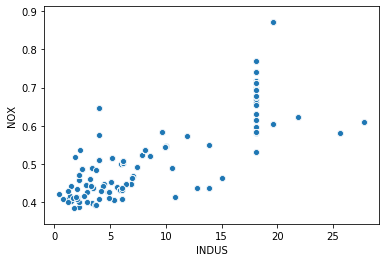

In [356]:
sns.scatterplot(x = 'INDUS', y = 'NOX', data = BH)

INDUS and NOX seems to have a little positive linear relationship. As INDUS increases, there is a little increase in NOX although it isn't general

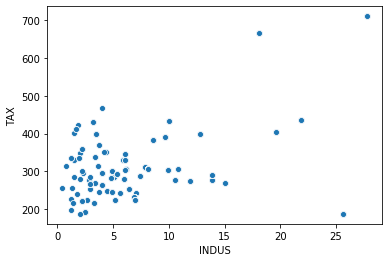

In [357]:
sns.scatterplot(x = 'INDUS', y = 'TAX', data = BH)

INDUS and TAX seems to have a little positive linear relationship. As INDUS increases, there is a little increase in TAX although it isn't general

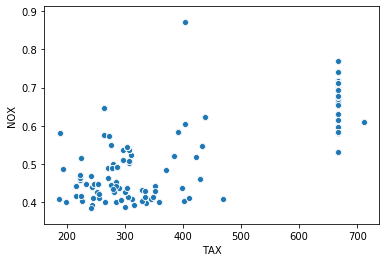

In [358]:
sns.scatterplot(x = 'TAX', y = 'NOX', data = BH)

NOX and TAX seems to have a little positive linear relationship. As INDUS increases, there is a little increase in TAX although it isn't general

In [359]:
BH.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'LSTAT', 'MEDV', 'CAT. MEDV'],
      dtype='object')

In [360]:
BH.dtypes

CRIM         float64
ZN           float64
INDUS        float64
CHAS           int64
NOX          float64
RM           float64
AGE          float64
DIS          float64
RAD            int64
TAX            int64
PTRATIO      float64
LSTAT        float64
MEDV         float64
CAT. MEDV      int64
dtype: object

In [361]:
BH.sample(20)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT. MEDV
439,9.39063,0.0,18.10,0,0.7400,5.627,93.9,1.8172,24,666,20.2,22.88,12.8,0
281,0.03705,20.0,3.33,0,0.4429,6.968,37.2,5.2447,5,216,14.9,4.59,35.4,1
63,0.12650,25.0,5.13,0,0.4530,6.762,43.4,7.9809,8,284,19.7,9.50,25.0,0
422,12.04820,0.0,18.10,0,0.6140,5.648,87.6,1.9512,24,666,20.2,14.10,20.8,0
354,0.04301,80.0,1.91,0,0.4130,5.663,21.9,10.5857,4,334,22.0,8.05,18.2,0
365,4.55587,0.0,18.10,0,0.7180,3.561,87.9,1.6132,24,666,20.2,7.12,27.5,0
45,0.17142,0.0,6.91,0,0.4480,5.682,33.8,5.1004,3,233,17.9,10.21,19.3,0
176,0.07022,0.0,4.05,0,0.5100,6.020,47.2,3.5549,5,296,16.6,10.11,23.2,0
403,24.80170,0.0,18.10,0,0.6930,5.349,96.0,1.7028,24,666,20.2,19.77,8.3,0
496,0.28960,0.0,9.69,0,0.5850,5.390,72.9,2.7986,6,391,19.2,21.14,19.7,0


In [362]:
Numerical_Predictors = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT', 'MEDV']

In [363]:
BH[Numerical_Predictors].corr()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,0.603800,-0.483725
NOX,0.420972,-0.516604,0.763651,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,0.543993,-0.468536
PTRATIO,0.289946,-0.391679,0.383248,0.188933,-0.355501,0.261515,-0.232471,0.464741,0.460853,1.000000,0.374044,-0.507787


The variables to remove are CRIM, INDUS, RAD and TAX

In [364]:
Bostoncopy = BH.copy()

In [365]:
Bostoncopy.drop(['CRIM', 'INDUS', 'RAD', 'TAX', 'CAT. MEDV', 'CHAS'], axis = 1, inplace = True)

In [366]:
Bostoncopy.columns

Index(['ZN', 'NOX', 'RM', 'AGE', 'DIS', 'PTRATIO', 'LSTAT', 'MEDV'], dtype='object')

In [367]:
predictors = ['ZN', 'NOX', 'RM', 'AGE', 'DIS', 'PTRATIO', 'LSTAT']

In [368]:
outcome = ['MEDV']

In [369]:
#parition data
X = Bostoncopy[predictors]
y = Bostoncopy[outcome]
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size = 0.4, random_state = 1)

In [370]:
#backward elimination
def train_model(variables):
    model = LinearRegression()
    model.fit(train_X[variables], train_y)
    return model

def score_model(model, variables):
    return AIC_score(train_y, model.predict(train_X[variables]), model)

best_model, best_variables = backward_elimination(train_X.columns, train_model, score_model, verbose=True)

print(best_variables)

Variables: ZN, NOX, RM, AGE, DIS, PTRATIO, LSTAT
Start: score=1807.44
Step: score=1807.44, remove None
['ZN', 'NOX', 'RM', 'AGE', 'DIS', 'PTRATIO', 'LSTAT']


In [377]:
#forward selection
def train_model(variables):
    if len(variables) == 0:
        return None
    model = LinearRegression()
    model.fit(train_X[variables], train_y)
    return model

def score_model(model, variables):
    if len(variables) == 0:
        return AIC_score(train_y, [train_y.mean()] * len(train_y), model, df=1)
    return AIC_score(train_y, model.predict(train_X[variables]), model)
                     
best_model, best_variables = forward_selection(train_X.columns, train_model, score_model, verbose = True)

print(best_variables)      


Variables: ZN, NOX, RM, AGE, DIS, PTRATIO, LSTAT
Start: score=2191.75, constant
Step: score=1934.91, add LSTAT
Step: score=1872.18, add RM
Step: score=1838.54, add PTRATIO
Step: score=1833.92, add DIS
Step: score=1815.37, add NOX
Step: score=1807.47, add ZN
Step: score=1807.44, add AGE
Step: score=1807.44, add None
['LSTAT', 'RM', 'PTRATIO', 'DIS', 'NOX', 'ZN', 'AGE']


In [378]:
#stepwise selection
best_model, best_variables = stepwise_selection(train_X.columns, train_model, score_model, verbose=True)
print(best_variables)

Variables: ZN, NOX, RM, AGE, DIS, PTRATIO, LSTAT
Start: score=2191.75, constant
Step: score=1934.91, add LSTAT
Step: score=1872.18, add RM
Step: score=1838.54, add PTRATIO
Step: score=1833.92, add DIS
Step: score=1815.37, add NOX
Step: score=1807.47, add ZN
Step: score=1807.44, add AGE
Step: score=1807.44, unchanged None
['LSTAT', 'RM', 'PTRATIO', 'DIS', 'NOX', 'ZN', 'AGE']


In [382]:
# Compute the validation performance for each of the three selected models. 
#model with predictors CRIM, CHAS & RM
#model with 13 predictors according the question d(i)
#model with predictors ZN, NOX, RM, AGE, DIS, PTRATIO & LSTAT


#Compare RMSE, MAPE, and mean error, as well as histograms of the errors. 
#Finally, describe the best model. 